In [85]:
import csv
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [87]:
File = pd.read_csv('Tweet_text.csv')

In [88]:
# File

In [89]:
# File['Text']

In [91]:
File["Compound"] = ""
File["Postivity"] = ""
File["Negativity"] = ""
File["Neutral"] = ""
File["Polarity"] = ""
File["Subjectivity"] = ""

In [92]:
File.head()

,Unnamed: 0,ico,tweet,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,tezos,b'Did you participated in Tezos? Already locke...,,,,,,
1,1,tezos,b'#Ethereum Co-Founder Takes to Twitter to Dis...,,,,,,
2,2,tezos,b'Will this drive the XRP value up? #cryptocur...,,,,,,
3,3,tezos,b'@CamiRusso and I just met with the CEO of @R...,,,,,,
4,4,tezos,"b""Check out my latest Flux episode- on bitcoin...",,,,,,


In [94]:
for index,row in File.iterrows():
#     print(row)
    sentence = row['tweet']
    print(sentence)
    blob = TextBlob(sentence)
    print("Polarity: ", blob.sentiment.polarity, "Subjectivity: ",blob.sentiment.subjectivity)
    compound = analyzer.polarity_scores(row['tweet'])["compound"]
    pos = analyzer.polarity_scores(row['tweet'])["pos"]
    neu = analyzer.polarity_scores(row['tweet'])["neu"]
    neg = analyzer.polarity_scores(row['tweet'])["neg"]
    print("Compound: ", compound, "Positivity: ", pos, "Neutral: ", neu, "Negative: ",neg)
    
    
    
    
    File.set_value(index, "Polarity", blob.sentiment.polarity)
    File.set_value(index, "Subjectivity", blob.sentiment.subjectivity)
    File.set_value(index, "Compound", compound)
    File.set_value(index, "Postivity", pos)
    File.set_value(index, "Negativity", neu)
    File.set_value(index, "Neutral", neg)


b'Did you participated in Tezos? Already locked and loaded in MSP'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Ethereum Co-Founder Takes to Twitter to Disagree With #Tezos #Blockchain Plan https://futurism.com/ethereum-co-founder-takes-to-twitter-to-disagree-with-tezos-blockchain-plan/ \xe2\x80\xa6 via @Futurism'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.3818 Positivity:  0.0 Neutral:  0.843 Negative:  0.157
b'Will this drive the XRP value up? #cryptocurrency #ripple #xrp #bitcoin #btc #blockchain #ethereum #ICO #litecoin #tezos #kik #KIN'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.34 Positivity:  0.118 Neutral:  0.882 Negative:  0.0
b'@CamiRusso and I just met with the CEO of @Ripple, who said the company will be cash flow positive this year. See more on @TheTerminal #xrp '
Polarity:  0.36363636363636365 Subjectivity:  0.5227272727272727
Compound:  0.5574 Positivity:  0.13 Neutral:  0.87 Negative:  0.0
b"Check out my late

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Ethereum Co-Founder Takes to Twitter to Disagree With Tezos Blockchain Plan '
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.3818 Positivity:  0.0 Neutral:  0.794 Negative:  0.206
b'Tezos is currently running what could be the largest Initial Coin Offering (ICO) there is. \n\nhttps://futurism.com/ethereum-co-founder-takes-to-twitter-to-disagree-with-tezos-blockchain-plan/ \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.2
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Rumble in the #cryptovalley: Ethereum co-founder @VitalikButerin disagrees with Tezos #blockchain plan http://ow.ly/o6BI30dxwzs  via @futurism'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.3182 Positivity:  0.0 Neutral:  0.859 Negative:  0.141
b'Talking with Tezos Co-Creator Kathleen Breitman '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Hacker News - The Tezos ICO has crossed $200M raised '

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Hacker News - The Tezos ICO is the latest crowdfunded project ever, at $200+ Million '
Polarity:  0.5 Subjectivity:  0.9
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Analyzing #Tezos: The New Digital Commonwealth https://medium.com/blockchain-at-berkeley/analyzing-tezos-the-new-digital-commonwealth-6679155aae49 \xe2\x80\xa6\n#bitcoin #blockchain #cryptocurrency'
Polarity:  0.06818181818181818 Subjectivity:  0.22727272727272727
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Finally looks like everyone is done vomiting #btc into #tezos'
Polarity:  0.0 Subjectivity:  1.0
Compound:  0.3612 Positivity:  0.217 Neutral:  0.783 Negative:  0.0
b'@tez0s how many @tezos for 1 eth?'
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Still better than an uncapped ICO like tezos & eos & Ethereum. The tokens will spread out through market forces & users gettin

Compound:  -0.3818 Positivity:  0.0 Neutral:  0.885 Negative:  0.115
b'Tezos'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'I created tezos wallet on your site a couple days ago. I go to your site today and it asks me to create another wallet, should I?'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.4767 Positivity:  0.151 Neutral:  0.849 Negative:  0.0
b'$btc\nClosed summit -> Agreement -> Fake signal -> Suspicious code -> Conflict\n\n$tezos\nset_new_feature -> vote -> promote_new_feature'
Polarity:  -0.5 Subjectivity:  1.0
Compound:  -0.34 Positivity:  0.147 Neutral:  0.596 Negative:  0.257
b'There are some interesting ICOs tho. What do you think of Tezos?'
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.4019 Positivity:  0.197 Neutral:  0.803 Negative:  0.0
b'Is Tezos ICO a Hype?\nhttps://www.applancer.co/blog/15-reasons-why-investing-in-tezos-ico-can-be-risky \xe2\x80\xa6\n@tez0s @ICOnews @Applancer_pro @iconewscom @BitcoinMagazine

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#tezos #ico #blockchain...'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'RT bitcoinagile "At $200 million, Tezos ICO is already the biggest ever, and its still going strong \xe2\x80\xa6 "'
Polarity:  0.4333333333333333 Subjectivity:  0.7333333333333333
Compound:  0.5106 Positivity:  0.155 Neutral:  0.845 Negative:  0.0
b'Ex-Goldman HFT Trader Makes Blockchain History Raising $200 Million In Tezos ICO In 4 Days: Who needs IPOs when you\xe2\x80\xa6 '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'The Tezos ICO is Already Worth $200 Million, Making it the Largest "Crypto-Funding" Ever https://futurism.com/the-tezos-ico-is-already-worth-200-million-making-it-the-largest-crypto-funding-ever/ \xe2\x80\xa6 via @Futurism'
Polarity:  0.3 Subjectivity:  0.1
Compound:  0.2263 Positivity:  0.101 Neutral:  0.899 Negative:  0.0
b'RT bitc

Compound:  0.5106 Positivity:  0.148 Neutral:  0.852 Negative:  0.0
b"At $200 million, Tezos ICO is already the biggest ever, and it's still going strong http://dlvr.it/PSMdJh   @mashable"
Polarity:  0.4333333333333333 Subjectivity:  0.7333333333333333
Compound:  0.5106 Positivity:  0.171 Neutral:  0.829 Negative:  0.0
b"At $200 million, Tezos ICO is already the biggest ever, and it's still going strong http://dlvr.it/PSMd8r "
Polarity:  0.4333333333333333 Subjectivity:  0.7333333333333333
Compound:  0.5106 Positivity:  0.18 Neutral:  0.82 Negative:  0.0
b"At $200 million, Tezos ICO is already the biggest ever, and it's still going strong http://dlvr.it/PSMd17   @mashable"
Polarity:  0.4333333333333333 Subjectivity:  0.7333333333333333
Compound:  0.5106 Positivity:  0.171 Neutral:  0.829 Negative:  0.0
b"At $200 million, Tezos ICO is already the biggest ever, and it's still going strong http://dlvr.it/PSMcjr "
Polarity:  0.4333333333333333 Subjectivity:  0.7333333333333333
Compound:  0

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Can you please email me your public key hash? contact[at]tezos.ch.'
Polarity:  0.0 Subjectivity:  0.5333333333333333
Compound:  0.3182 Positivity:  0.204 Neutral:  0.796 Negative:  0.0
b'any news about tezos ? any opinions ? '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'With 11 days to go, and total funds already north of $130 million, it looks like the Tezos ICO will be the biggest crowdfunding effort ever. '
Polarity:  0.0 Subjectivity:  0.75
Compound:  0.3612 Positivity:  0.091 Neutral:  0.909 Negative:  0.0
b'Apparantly Tezos will try to become an official state currency. '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#tezos #crowdfundinfg stats https://canadiancrypto.io/tezos-stats/  #ico #tokensale'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Our current long ter

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'1 \xe2\x80\x93 Michelson: The Language of Smart Contracts in Tezos [pdf] - https://goo.gl/2zwxg3 '
Polarity:  0.21428571428571427 Subjectivity:  0.6428571428571429
Compound:  0.4019 Positivity:  0.197 Neutral:  0.803 Negative:  0.0
b'Cointelegraph : Tezos 12-day uncapped ICO will be biggest ever, $160 mln raised so far\n#Bitcoin\nbrianeha\n\xe2\x80\xa6 https://twitter.com/Cointelegraph/status/881844224928468992 \xe2\x80\xa6)'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Tezos 12-day uncapped ICO will be biggest ever, $160 mln raised so far\n#Bitcoin\n@brianeha\nhttps://goo.gl/uEr9pm '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Crypto Ledger Tezos Raises $160 Mln In 32 Hours, Will Become Largest ICO Ever '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Tezos 12-day uncapp

Polarity:  0.315 Subjectivity:  0.445
Compound:  0.5423 Positivity:  0.2 Neutral:  0.8 Negative:  0.0
b'@antisinoptikon tezos nas\xc4\xb1l sat\xc4\xb1n alabiliriz acaba'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Nah, I'm just shilling. It was a free handle. Willing to sell to any tezos fanatic."
Polarity:  0.11666666666666668 Subjectivity:  0.7833333333333333
Compound:  0.5106 Positivity:  0.191 Neutral:  0.809 Negative:  0.0
b'There is a lot of RED in Cryptopia because of... TEZOS? \xe2\x80\x94 Steemit https://steemit.com/altcoins/@krytonika/there-is-a-lot-of-red-in-cryptopia-because-of-tezos \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"And hey why'd you change your handle? You like tezos that much? Even more than bismuth?"
Polarity:  0.35 Subjectivity:  0.35
Compound:  0.466 Positivity:  0.169 Neutral:  0.831 Negative:  0.0
b'#tezos #blockchain #ethereum #bitcoin'


Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'How do you sign in to your account to contribute more bitcoins to buy tezos? @tez0s'
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Tezos has raised almost $90 Million USD in less than 24hrs. RIP #ICOs'
Polarity:  -0.16666666666666666 Subjectivity:  0.06666666666666667
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bitfinex newsletter, Opinion on Tezos Read more at: http://ift.tt/2ubGdCb  #trading #speculating'
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bitfinex newsletter, Opinion on Tezos Check it out! http://ift.tt/2ubGdCb  #cryptocurrency #steem #blockchain'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'@tez0s is there an ETA on the fix for check contributions? #tezos'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Its misleading as no mention is made about minimum contributions and even on this step it says for 0.1 ETH you get 67.062 tezos.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.5994 Positivity:  0.0 Neutral:  0.818 Negative:  0.182
b'This is misleading. It states I would get 67.062 tezos for 0.1 ETH '
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.4019 Positivity:  0.0 Neutral:  0.803 Negative:  0.197
b'contact[-replace this with @ -]tezos dot ch'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Even @nanexllc read the #Tezos whitepaper already, wow!\n\nI thought he isn't crypto markets at all. This space is lit"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Reading white paper/docs/blogs from Tezos (bitcoin 2). One red flag: the sophomoric criticism of c/c++. Kids?'
Polarity:  -0.06666666666666667 Subjectivity:  0.133333333

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Pls help,I follow the link from pdf tezos wallet, to my wallet, wallet don't see my funds, but if I http://check.tezos.com  I see my transac"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Tezos is an experiment in the uncapped ICO.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Guess now's a good time to buy $DCR before everyone catches on Tezos is basically an expensive $DCR w/ more marketing & high profile backers"
Polarity:  0.215 Subjectivity:  0.585
Compound:  0.4404 Positivity:  0.116 Neutral:  0.884 Negative:  0.0
b' New Ethereum Killer? Tezos ICO Review & How To Contribute/ Invest In Tezos ICO: http://youtu.be/-rqIK8sAwvU?a  via @YouTube'
Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  -0.6868 Positivity:  0.0 Neutral:  0.774 Negative:  0.226
b'@traderx

Polarity:  0.4166666666666667 Subjectivity:  0.5
Compound:  0.2023 Positivity:  0.065 Neutral:  0.935 Negative:  0.0
b'#Tezos \xe8\xb3\xbc\xe5\x85\xa5\xe5\xae\x8c\xe4\xba\x86\xe3\x81\x98\xe3\x82\x83\xe3\x80\x82'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Tezos ico\n\n2860 btc\n2036 eth\n Contributed in 50 minutes..'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Calling it now with Tezos https://www.tezos.com  #blockchain via @tez0s'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'right now all the latecomers to ETH are reading the TEZOS pitch and thinking "shit this is the next big thing" -- weak hands being shaken'
Polarity:  -0.057857142857142864 Subjectivity:  0.4121428571428572
Compound:  -0.7783 Positivity:  0.0 Neutral:  0.747 Negative:  0.253
b'Discover Tezos https://www.tezos.com  #blockchain via @tez0s'
Polarity:  0.0 Subjec

Compound:  0.6249 Positivity:  0.227 Neutral:  0.773 Negative:  0.0
b'Tezos crowdsale starts in just under 4 hours, hold onto your butts'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Attacks on @tezos illustrate an important point: even though a #blockchain can be made very secure, the rest of the world isn't."
Polarity:  0.46 Subjectivity:  0.89
Compound:  0.5413 Positivity:  0.191 Neutral:  0.809 Negative:  0.0
b'Tezos shuts down Slack channel few hours before ICO starts  http://zpr.io/Pdf7m  h/t @reddit'
Polarity:  -0.1777777777777778 Subjectivity:  0.19444444444444448
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'If you are investing in Tezos, please explain why '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.3182 Positivity:  0.223 Neutral:  0.777 Negative:  0.0
b'Invest in Tezos with your eyes open - under their terms, they can take your money and never give you a thing. KNOW that, invest at your risk'
Polarity

b'Tezos fikrini de\xc4\x9fi\xc5\x9ftirmi\xc5\x9f san\xc4\xb1r\xc4\xb1m :) sabah 9 da uyand\xc4\xb1rmam\xc4\xb1 istermisin :) '
Polarity:  0.5 Subjectivity:  1.0
Compound:  0.7184 Positivity:  0.429 Neutral:  0.571 Negative:  0.0
b'Tezos\xe3\x81\xaf\xe4\xb8\x8a\xe9\x99\x90\xe3\x81\xaa\xe3\x81\x84\xe3\x81\x97\xe3\x80\x81\xe7\x99\xba\xe8\xa1\x8c\xe9\x87\x8f\xe3\x81\x8c\xe5\xa2\x97\xe3\x81\x88\xe3\x82\x8b\xe3\x81\x8b\xe3\x82\x89ICO\xe3\x81\xaf\xe3\x81\xaa\xe3\x81\x97\xe3\x81\x8b\xe3\x81\xaa\xe3\x80\x82\xe3\x81\x95\xe3\x82\x89\xe3\x81\xab4\xe3\x83\xb6\xe6\x9c\x88\xe4\xbb\xa5\xe4\xb8\x8a\xe6\x8b\x98\xe6\x9d\x9f\xe3\x81\x95\xe3\x82\x8c\xe3\x82\x8b\xe3\x81\xae\xe3\x81\xaf\xe5\x8e\xb3\xe3\x81\x97\xe3\x81\x84\xe3\x80\x82'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'BitcoinSuisse\xe3\x81\x8b\xe3\x82\x89\xe8\xbf\x94\xe4\xbf\xa1\xe3\x81\x8d\xe3\x81\x9f\xe3\x83\xbc\n\xe3\x81\x91\xe3\x81\xa9Tezos\xe3\x81\x98\xe3\x82\x83\xe3\x81\xad\xe3\x83\xbc\xe3\

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Why I\xe2\x80\x99m advising Tezos @zooko \xe2\x80\x93 <network is bigger than any single #cryptocurrency\xe2\x80\x94network is all cryptocurrencies> http://buff.ly/2t7fYfR '
Polarity:  -0.03571428571428571 Subjectivity:  0.35714285714285715
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'bullsh on $BTC @anambroid made a noice charT.. and #TEZOS longtimeHODL .. good Potential imo'
Polarity:  0.35 Subjectivity:  0.8
Compound:  0.4404 Positivity:  0.182 Neutral:  0.818 Negative:  0.0
b'Just watched this earlier tonight. I also agree with you on derose. Tezos has a lot of holes it seems as well as its value proposition.'
Polarity:  0.0 Subjectivity:  0.5
Compound:  0.7184 Positivity:  0.25 Neutral:  0.75 Negative:  0.0
b'Tezos?'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Core Media - TEZOS: The self-amending cryptographic ledger http://coremedia.info/blockchai

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'in case of @MineFilecoin, your personal files are not yet stored anywhere, they have no actual storage network online yet'
Polarity:  0.0 Subjectivity:  0.2
Compound:  -0.296 Positivity:  0.0 Neutral:  0.896 Negative:  0.104
b"I'll DM you the Filecoin SAFT. If you sell tokens which are or might be considered securities to US investors, you need a SAFT, not SAFE."
Polarity:  -0.25 Subjectivity:  0.5
Compound:  0.296 Positivity:  0.084 Neutral:  0.916 Negative:  0.0
b"InterPlanetary File System (IPFS). That's It! Unthinkable.\nhttps://steemit.com/filecoin/@nascimentoab/interplanetary-file-system-ipfs-that-s-it-unthinkable \xe2\x80\xa6\n#filecoin #bitcoin #blockchain"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Why Amazon's Margin Is Filecoin's Opportunity http://bit.ly/2ijTE14  #Business"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.4215 Positivity:  0.286 Neutral:  0.714

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5719 Positivity:  0.32 Neutral:  0.68 Negative:  0.0
b"Filecoin's ICO Raised Incredible $188 Million in Just 60 Minutes "
Polarity:  0.9 Subjectivity:  0.9
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"It's good tech! But I prefer Dat. IPFS doesn't have secure ledgers, doesn't handle mutability as well, and now depends on Eth with Filecoin"
Polarity:  0.6375 Subjectivity:  0.6000000000000001
Compound:  0.5033 Positivity:  0.194 Neutral:  0.732 Negative:  0.075
b'So if @UnikrnCo is planning on selling $100m in crypto currency what is the true value of #Filecoin @protocollabs ?'
Polarity:  0.35 Subjectivity:  0.65
Compound:  0.6369 Positivity:  0.224 Neutral:  0.776 Negative:  0.0
b'I understand what you mean, we can see it with $EOS !! And $SIA is still one of my best long term invest '
Polarity:  0.15390625 Subjectivity:  0.4625000000000001
Compound:  0.6988 Positivity:  0.179 Neutral:  0.821 Negative:  0.0
b'Whitepaper im

b'Things are heating up! ICO Madness Unabated As Filecoin Raises $200M From Public & Traditional VCs - Crunchbase News '
Polarity:  0.0 Subjectivity:  0.4083333333333333
Compound:  -0.4926 Positivity:  0.0 Neutral:  0.834 Negative:  0.166
b'FileCoin is interesting from a distributed systems perspective.  It used to be called Grid Computing but with the token incentive mechanism.'
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.6249 Positivity:  0.221 Neutral:  0.779 Negative:  0.0
b"Will Filecoin's ICO raise a record $250bn and push the total raised by Initial Coin Offerings over $2bn?  https://buff.ly/2x1a9l4 "
Polarity:  0.0 Subjectivity:  0.375
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'"Overwhelming Demand" Sees Filecoin ICO Raise $250 Million Without A Viable Product. '
Polarity:  0.5 Subjectivity:  1.0
Compound:  -0.128 Positivity:  0.0 Neutral:  0.87 Negative:  0.13
b'Filecoin Suspends ICO After Raising $186M in One Hour '
Polarity:  0.0 Subjectivity:  0.0
Com

Polarity:  0.14285714285714285 Subjectivity:  0.31785714285714284
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'IPFS and Filecoin will be 2nd'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Filecoin\xe2\x80\x99s #ICO Shatters Records by Raising Nearly $200 Million in Just 1 Hour http://j.mp/2vzD28a  #Cryptocurrency'
Polarity:  0.1 Subjectivity:  0.4
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Wishlist: an ICO site that shows a standardized coin/token distribution stacked area chart over 20 years. e.g. @ryaneshea's Filecoin one "
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Does this include investments like filecoin ICO? '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.3612 Positivity:  0.294 Neutral:  0.706 Negative:  0.0
b'The @MineFilecoin ICO is about to cross $200mm raised .. not counting the $52mm raised 2 weeks ago.\n\nhttps://coinlist.co/cur

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Filecoin #ICO \xe2\x80\x9cTemporarily Paused\xe2\x80\x9d After Raising $187\xe2\x80\xa6 http://dlvr.it/Pdb8qd  #crowdfunding #startups #aimigogo #aimiamos #fundraising'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Filecoin\xe2\x80\x99s ICO opens today for accredited investors after raising $52M from advisers http://dlvr.it/Pdb0pn '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'After a day+ suspension, Filecoin ICO set to reopen later today. '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'The token sale reopens tomorrow Aug 12, at 11am PDT (18:00 UTC)  https://protocol.ai/blog/sale-update-and-reopen/ \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Filecoin #ICO \xe2\x80\x9cTemporarily Paused\xe2\x80\x9d After R

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'$200 Million In 60 Minutes: Filecoin #ICO Rockets to Record Amid Tech Issues http://bit.ly/2vJCa3l  via @CoinDesk #blockchain #tech'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Filecoin Suspends ICO After Raising $186M in One Hour https://www.financemagnates.com/cryptocurrency/news/filecoin-suspends-ico-raising-186-million-one-hour-clogs-system/ \xe2\x80\xa6 (http://news.ycombinator.com/item?id=14988132 \xe2\x80\xa6)'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Filecoin\xe2\x80\x99s ICO Shatters Records by Raising Nearly $200 Million in Just 1 Hour '
Polarity:  0.1 Subjectivity:  0.4
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Filecoin pause? SEC?'
Polarity:  -0.1 Subjectivity:  0.6
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'a quick break from a holiday: did Filecoin raised almos

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'ICO watch: Filecoin ICO suspended after $186 raised, clogging system https://buff.ly/2vpXsSL  #ICO @minefilecoin '
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.4767 Positivity:  0.0 Neutral:  0.795 Negative:  0.205
b"but this reckless uncapped filecoin ico won't help efforts against regulation & cause lasting damage across the whole landscape."
Polarity:  0.1 Subjectivity:  0.2
Compound:  -0.7997 Positivity:  0.0 Neutral:  0.648 Negative:  0.352
b'2/2\nWhile filecoin has no any actual product yet and just a whitepaper only.'
Polarity:  0.0 Subjectivity:  0.55
Compound:  -0.296 Positivity:  0.0 Neutral:  0.833 Negative:  0.167
b"What's the difference between #IPFS and #ShiftNrg? IPFS=protocol, #Shift=#Dapp platform+#cryptocurrency, #Phantom=#GUI for IPFS #Filecoin"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Filecoin Suspends ICO After Raising $186 Million in One Hour C

Compound:  0.5994 Positivity:  0.196 Neutral:  0.804 Negative:  0.0
b'Honest question: did Filecoin VC investors use capital from their funds? Or partners capital? Or sidecar?'
Polarity:  0.6 Subjectivity:  0.9
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Retweeted Ben Davenport (@bendavenport):\n\nCoinbase: We raised $100M!\nFilecoin: Hold my beer.\nhttps://www.coindesk.com/200-million-60-minutes-filecoin-ico-rockets-record-amid-tech-issues/?utm_content=buffer32284&utm_medium=social&utm_source=twitter.com&utm_campaign=buffer \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Siacoin a better project than Filecoin!\n#sc'
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.4926 Positivity:  0.444 Neutral:  0.556 Negative:  0.0
b'Token sales generated a stunning $2bn now with @MineFilecoin. Congrats to all the amazing teams out there building a decentralized future!'
Polarity:  0.3666666666666667 Subjectivity:  0.67

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'will the ICO continue or are you finished raising funds?'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Do I want to mine badly distributed/premined #filecoin on centralized eth OR decentralized #sia doing today all filecoin wants in future? '
Polarity:  -0.1666666666666666 Subjectivity:  0.2972222222222222
Compound:  -0.4215 Positivity:  0.058 Neutral:  0.804 Negative:  0.138
b'Update: still at it, making sure we get everything right. Thanks for the patience!'
Polarity:  0.3452380952380952 Subjectivity:  0.5415343915343914
Compound:  0.6696 Positivity:  0.314 Neutral:  0.686 Negative:  0.0
b"NEO is much farther along in development, so it's definitely warranted. My point is you can expect to see Tezos and Filecoin soon."
Polarity:  0.1 Subjectivity:  0.35
Compound:  0.4549 Positivity:  0.119 Neutral:  0.881 Negative:  0.0
b'$200 Million In

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Cryptocurrency nerds - Filecoin thoughts? Cool concept?'
Polarity:  0.35 Subjectivity:  0.65
Compound:  0.3939 Positivity:  0.347 Neutral:  0.653 Negative:  0.0
b'@MineFilecoin how do i become a bitcoin miner on my own time.'
Polarity:  0.6 Subjectivity:  1.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"If I'm reading this right, SHIFT is doing similar shit to Filecoin?"
Polarity:  0.028571428571428564 Subjectivity:  0.5785714285714286
Compound:  -0.5574 Positivity:  0.0 Neutral:  0.753 Negative:  0.247
b'Also, filecoin works on proof of stake whereas sia on proof of work. Will there be a change in the future or will we see a fork.'
Polarity:  0.0 Subjectivity:  0.125
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'$200 Million In 60 Minutes: #Filecoin #ICO Rockets to Record Amid Tech Issues  #blockchain  https://www.coindesk.com/200-million-60-minutes-filec

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Filecoin: buyer beware Check it out! http://ift.tt/2vTx3xo  #cryptocurrency #steem #blockchain'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Am invested in Sia.\n\nI wont invest in filecoin at this price.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Aarghhhhhhhhhhhhhhh. I want to kick myself.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0772 Positivity:  0.245 Neutral:  0.755 Negative:  0.0
b"Probably the second only ICO I've seen that doesn't have to worry about the SEC actually."
Polarity:  -0.025 Subjectivity:  0.42500000000000004
Compound:  0.3412 Positivity:  0.138 Neutral:  0.862 Negative:  0.0
b'Is your disappointment with filecoin, or the SEC rules prohibiting non-accredited investors?'
Polarity:  -0.35 Subjectivity:  0.5
Compound:  -0.5106 Positivity:  0.0 Neutral:  0.769 Negative:  0.231
b'#tech #news  Filec

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'@aradchenko1 @MineFilecoin > 200M ICO. BOOM. What do you think. \xd0\x92\xd1\x8b \xd1\x83\xd1\x81\xd0\xbf\xd0\xb5\xd0\xbb\xd0\xb8 \xd0\xb7\xd0\xb0\xd0\xba\xd1\x83\xd0\xbf\xd0\xb0\xd1\x82\xd1\x8c\xd1\x81\xd1\x8f ?'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'@MineFilecoin when will first hour investors know their price / FIL? Or is the $ given at purchase accurate already?'
Polarity:  0.32500000000000007 Subjectivity:  0.4833333333333334
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b''
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'what happened during the last 4 minutes?!  $100MM drop'
Polarity:  0.0 Subjectivity:  0.06666666666666667
Compound:  -0.3382 Positivity:  0.0 Neutral:  0.745 Negative:  0.255
b'Does this mean $150m + $252m? or does it mean you have 150m out of 252m confirmed?'
Polarity:  -0.075 Su

Polarity:  0.020833333333333332 Subjectivity:  0.5333333333333333
Compound:  -0.3612 Positivity:  0.143 Neutral:  0.606 Negative:  0.251
b'make Americans invest again'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'I have asked couple times. Please tell me if I can change the vesting period.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.3182 Positivity:  0.15 Neutral:  0.85 Negative:  0.0
b'$250M in 30 min. @MineFilecoin is shattering every ceiling. speechless.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Can you give the people that aren't millionaires investors a time and date we can buy on the exchange since we excluded"
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.34 Positivity:  0.0 Neutral:  0.893 Negative:  0.107
b'Yes, it is being extended to the full hour. Our apologies for the downtime.'
Polarity:  0.35 Subjectivity:  0.55
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 N

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Yeah I am seeing the same - can't tell if I am done or what?"
Polarity:  0.0 Subjectivity:  0.125
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'filecoin site\'s "$ raised" seemed like an automatic counter from 50M->80M right when it opened, and then after reopening somehow back to 60M'
Polarity:  0.14285714285714285 Subjectivity:  0.26785714285714285
Compound:  0.3612 Positivity:  0.102 Neutral:  0.898 Negative:  0.0
b'@MineFilecoin should I submit a second cash payment? Mine has yet to go through? 10 mins waiting'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Filecoin nice'
Polarity:  0.6 Subjectivity:  1.0
Compound:  0.4215 Positivity:  0.737 Neutral:  0.263 Negative:  0.0
b'OK, successful purchase!'
Polarity:  0.71875 Subjectivity:  0.725
Compound:  0.6239 Positivity:  0.672 Neutral:  0.328 Negative:  0.0
b'Got in at 1 sec after start time. File pulled m

Compound:  -0.5859 Positivity:  0.0 Neutral:  0.208 Negative:  0.792
b'issues connecting to server'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'getting the error 504 Gateway Time-out'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.4019 Positivity:  0.0 Neutral:  0.649 Negative:  0.351
b'Getting this error repeatedly: Faired to create investment: Timeout of 10000ms exceeded'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.1531 Positivity:  0.142 Neutral:  0.676 Negative:  0.182
b'"Network Error"'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Aaaand, website is down'
Polarity:  -0.15555555555555559 Subjectivity:  0.2888888888888889
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Here's how the #filecoin #ico is going."
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'@MineFilecoin Timeouts and failing. Ugh. '
Polarity:  0.

b'Will it be possible for one investor in #filecoin to buy multiple traunches of coins with different vesting periods and discounts?'
Polarity:  0.0 Subjectivity:  0.5333333333333333
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"New additions to #Neufund's #ICOTransparencyMonitor icomonitor.io @gnosisPM @MineFilecoin - check it out #blockchain #smartcontracts #ico"
Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"How to register without tax info? I have filed an extention for 2016 and won't have the paperwork until next month"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Hello world, meet Filecoin. '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"I still fear there's a scenario in which the bottom could completely fall out of the value of all #cryptocurrency:"
Polarity:  0.1 Subjectivity:  

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'"Bancor, a platform for launching blockchain tokens, raises ~$150M in largest-ever ICO (Stan Higgins/CoinDesk)" '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#TechNews Digital token project Bancor raises nearly $147 million - '
Polarity:  0.05 Subjectivity:  0.2
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Bancor scientists were so preoccupied w/ whether or not they could, they didn't stop to think if they should. #ethereum #JurassicPark"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.2235 Positivity:  0.086 Neutral:  0.914 Negative:  0.0
b'#wings has been falling sharply over the last few days. My theory is that wings are being "locked" into the #Bancor evaluation... '
Polarity:  -0.10833333333333334 Subjectivity:  0.3055555555555555
Compound:  -0.1531 Positivity:  0.0 Neutral:  0.929 Negative:  0.071
b'Bancor Network Token (BNT) with \xe2\x80\x98massiv

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Blockchain Capital invests in BNT as Bancor fundraiser goes over $100m http://buff.ly/2s3Jum7 '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Bitcoin @BitcoinRTs  Bancor\xe2\x80\xa6 http://dlvr.it/PLn9Yw   |Follow our trading signal at http://bit.ly/FXSignal  @Relay_RTs @HyperRTs @dnr_crew'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Understanding Bancor \xe2\x80\x93 Scott Morris \xe2\x80\x93 Medium http://ow.ly/AYvQ30cx2R2  (i think this is groundbreaking)'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Blockchain Capital invests in BNT as Bancor fundraiser goes over $100m - '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'http://ethereum-infochain.blogspot.com/2017/06/bancor-is-already-one-of-biggest-icos.html \xe2\x80\x

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Yep hahaha. Bancor sucked in a lot of ETH, you guys don't get basic economics supply/demand"
Polarity:  0.1 Subjectivity:  0.2625
Compound:  0.1531 Positivity:  0.184 Neutral:  0.663 Negative:  0.153
b'so did everyone in crypto liquidated their altcoins to buy #Bancor $BNT?  https://etherscan.io/address/0x5894110995b8c8401bd38262ba0c8ee41d4e4658 \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'I just upvoted Bancor Network on @ProductHunt. Check it out: http://bit.ly/2teahLQ  #Tech'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor ICO moved ~80k $ETH an hour ago. Possible reason for flash crash? Seeing a nice rebound.'
Polarity:  0.3 Subjectivity:  1.0
Compound:  0.0258 Positivity:  0.144 Neutral:  0.718 Negative:  0.138
b'Woah... $153M raised in hours... \n$150 Million: Bancor Completes Largest-Ever ICO  htt

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor now largest token sale in history above The DAO, $142M https://etherscan.io/address/0x5894110995b8c8401bd38262ba0c8ee41d4e4658 \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.1
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor is already one of the biggest ICOs in history (in its first hour) #Ethereum'
Polarity:  0.25 Subjectivity:  0.3333333333333333
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Wonder when and where Bancor will show up on exchanges?'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'how much bancor did you guy? lol. we need to connect this week. does Wednesday work?'
Polarity:  0.5 Subjectivity:  0.44999999999999996
Compound:  0.4871 Positivity:  0.174 Neutral:  0.826 Negative:  0.0
b"What does it exactly mean if it shows 'unable to locate transaction entry'?? Should i stay calm or panic?\n\n$eth #bancor #crypto"
Pola

Compound:  -0.2263 Positivity:  0.0 Neutral:  0.894 Negative:  0.106
b'\xe3\x81\xaf\xe3\x81\x98\xe3\x82\x81\xe3\x81\xbe\xe3\x81\x97\xe3\x81\xa6\xe3\x80\x82\n\xe5\xa4\xa7\xe7\x9f\xb3\xe3\x81\x95\xe3\x82\x93\xe3\x81\xae\xe8\xa8\x80\xe3\x81\xa3\xe3\x81\xa6\xe3\x82\x8b\xe8\xaa\xac\xe6\x98\x8e\xe3\x81\x97\xe3\x81\xa6\xe3\x81\x8f\xe3\x82\x8c\xe3\x81\x9f\xe4\xba\xba\xe3\x81\xa3\xe3\x81\xa6\xe3\x81\xae\n\xe6\x99\xae\xe9\x80\x9a\xe3\x81\xab\xe3\x81\x8a\xe8\xa9\xb1\xe3\x81\x97\xe3\x81\x97\xe3\x81\x9f\xe3\x81\x93\xe3\x81\xa8\xe3\x82\x82\xe3\x81\x82\xe3\x82\x8a\xe3\x81\xbe\xe3\x81\x99\xe3\x80\x82\n\xe3\x83\xad\xe3\x83\x9c\xe3\x83\x83\xe3\x83\x88\xe3\x81\xa7\xe3\x82\x82\xe3\x81\xaa\xe3\x81\x84\xe3\x81\x97\xe3\x80\x81bancor\xe3\x81\xae\xe9\x96\xa2\xe4\xbf\x82\xe8\x80\x85\xe3\x81\xa7\xe3\x82\x82\xe3\x81\x82\xe3\x82\x8a\xe3\x81\xbe\xe3\x81\x9b\xe3\x82\x93\xe3\x80\x82\n\xe3\x81\x9d\xe3\x81\xae\xe4\xba\xba\xe3\x81\xae\xe5\x90\x8d\xe8\xaa\x89\xe3\x81\xae\xe3\x81\x9f\xe3\x82\x81\xe3\x81\xab\xe3\x81\x93\xe

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Reports popping up, claiming funds sent via #Ethereum Blockchain during #Bancor ICO just disappeared.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'1 BNT = 0.1 ETH!! (Bancor) Check it out! http://ift.tt/2sUfJ7y  #cryptocurrency #steem #blockchain'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'I guess $80M is just not enough #Bancor'
Polarity:  0.0 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'hehe - was so happy my reveal period started ~1h before the bancor thingy .. '
Polarity:  0.8 Subjectivity:  1.0
Compound:  0.6948 Positivity:  0.267 Neutral:  0.733 Negative:  0.0
b'Can we break the 150M DAO record? Bancor devs think so https://slacknation.github.io/medium/017/ '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Bahaha!!! I don't even 

Polarity:  -0.03333333333333332 Subjectivity:  0.22499999999999998
Compound:  0.5994 Positivity:  0.164 Neutral:  0.836 Negative:  0.0
b'bancor might be the next emergent threat to ETH. #bancor'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.5267 Positivity:  0.0 Neutral:  0.726 Negative:  0.274
b"When I met ECU-Architect Bernard Lietaer a few weeks back all he wanted to talk about was Bancor Protocol So I thought I'd give it a shot :)"
Polarity:  0.09999999999999999 Subjectivity:  0.3666666666666667
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor Brings Cryptocurrency to the Masses Through Smart Contract Exchange '
Polarity:  0.21428571428571427 Subjectivity:  0.6428571428571429
Compound:  0.4019 Positivity:  0.231 Neutral:  0.769 Negative:  0.0
b'Bancor ICO: $66,912,611.30 ($393.49/ETH) - and it is growing\nhttps://etherscan.io/address/0x5894110995b8c8401bd38262ba0c8ee41d4e4658 \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neut

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'i cant me buy bancor, tell me Why not? '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Bancor Network #Token (BNT) allocation event on #ethereum will begin in exactly 60 MIN. To #liquidity and beyond! https://bancor.network/fundraiser  '
Polarity:  0.3125 Subjectivity:  0.25
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor \xe8\xb2\xb7\xe3\x81\x88\xe3\x81\xbe\xe3\x81\x97\xe3\x81\x9f\xe3\x80\x82\xe3\x80\x82BNT\xe3\x83\x88\xe3\x83\xbc\xe3\x82\xaf\xe3\x83\xb3\xe3\x81\xa6\xe3\x81\xa9\xe3\x81\x86\xe3\x82\x84\xe3\x81\xa3\xe3\x81\x9f\xe3\x82\x89\xe8\xa6\x8b\xe3\x81\x88\xe3\x82\x8b\xe3\x82\x93\xe3\x81\xa7\xe3\x81\x97\xe3\x82\x87(;\xc2\xb4\xd0\x94`A ```'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor ICO... $26mil in 30mins and counting Check it out! http://ift.tt/2tcRSzd  #cryptocurrency #steem #blockcha

Compound:  0.4003 Positivity:  0.31 Neutral:  0.69 Negative:  0.0
b'@blockchaincap announces participation in #Bancor Network Token (BNT). Excited to have innovators in finance join us https://goo.gl/0dIjbj '
Polarity:  0.375 Subjectivity:  0.75
Compound:  0.5574 Positivity:  0.235 Neutral:  0.765 Negative:  0.0
b'What is the fastest, most efficient want to sell Bancor (BNT) back to the market? '
Polarity:  0.25 Subjectivity:  0.25
Compound:  0.5678 Positivity:  0.264 Neutral:  0.736 Negative:  0.0
b'Tim Draper joins Bancor advisory board - http://cryptogeeks.com/tim-draper-joins-bancor-advisory-board \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Bancor: The Fluidity #Protocol http://www.the-blockchain.com/2017/06/12/bancor-fluidity-protocol/ \xe2\x80\xa6 #ICO #WINGS #blockchain #smarttokens'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Bancor Network #Token (BNT) allo

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Gnosis & Bancor Partner on the First Ever Token Changer (GNOBNT) http://ift.tt/2rapiO8  #blockchain #medium #bitcoin'
Polarity:  0.25 Subjectivity:  0.3333333333333333
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor: The Fluidity Protocol - http://bit.ly/2rmIMyw  - #bitcoin #news\nAdvertise >>> http://bit.ly/2leCsdb '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'im not real eager to jump into bancor'
Polarity:  -0.1 Subjectivity:  0.30000000000000004
Compound:  -0.2755 Positivity:  0.0 Neutral:  0.768 Negative:  0.232
b'the project Bancor was joined by not a few different coins. Capitalization will soon be like the ETH\nhttps://bancor.network \n#Bancor #token'
Polarity:  0.05 Subjectivity:  0.35
Compound:  0.3612 Positivity:  0.122 Neutral:  0.878 Negative:  0.0
b'#Bancor Protocol - Our fundraiser will begin on June 12, 14:00 GMT - https://bancor.netw

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Ahaha so we have Bancor ICO starting in 4 hours. We have the Blockchain Conference in China in 2 days announcing new EEA partners... Bulllll'
Polarity:  0.06818181818181818 Subjectivity:  0.2772727272727273
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'A Bit About Bancor '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'ICO Analysis: Bancor http://dlvr.it/PLfDgs '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'The Bancor Platform Demo v1.2 \xe2\x80\x93 The Bancor Protocol '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"I'm not going to invest in Bancor. Reason: apparently the whole twitter is going to."
Polarity:  0.125 Subjectivity:  0.375
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Status\xe3\x81\xa8Bancor\xe3\x81\xaeICO\xe3\x81\xae\xe3\x8

Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Bancor Use Case #1 Utilizing long tail #user generated currencies'
Polarity:  -0.05 Subjectivity:  0.4
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Bancor #Protocol Use Case #2 A network #smart token changers'
Polarity:  0.21428571428571427 Subjectivity:  0.6428571428571429
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Bancor launch: Giao th\xe1\xbb\xa9c ti\xc3\xaau chu\xe1\xba\xa9n Smart Tokens, m\xe1\xbb\x9f b\xc3\xa1n Token BNT h\xc3\xb4m nay https://clix5.com/bancor-launch-giao-thuc-tieu-chuan-smart-tokens-mo-ban-token-bnt-hom-nay/ \xe2\x80\xa6'
Polarity:  0.21428571428571427 Subjectivity:  0.6428571428571429
Compound:  0.4019 Positivity:  0.153 Neutral:  0.847 Negative:  0.0
b"EtherWorld's #blockchain weekly: June 11, 2017\nhttp://etherworld.co/topic/75/etherworld-s-blockchain-weekly-june-11-2017 \xe2\x80\xa6\n#crypto

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#CryptoTrading   EXSCUDO ICO - Who has invested in this? http://dlvr.it/PGS3W8  \xe2\x86\x92 via http://goo.gl/ifcBSF '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'RT ex_scudo: #iCOexsc Exclusive Q&amp;A Interview with Exscudo CEO Andrew Zimine https://youtu.be/37lq1dTAumo  \n#blockchain #cryptocurrency'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.128 Positivity:  0.103 Neutral:  0.897 Negative:  0.0
b"#icoexsc New ICO\nExcited to see this thing Launch! Who's behind me!\n#Exscudo The New Way to Pay #worldwide"
Polarity:  -0.031060606060606077 Subjectivity:  0.5363636363636364
Compound:  -0.2462 Positivity:  0.0 Neutral:  0.89 Negative:  0.11
b'EXSCUDO\nis the gateway between the traditional \neconomy and the cryptocurrency market #icoexsc'
Polarity:  0.0 Subjectivity:  0.75
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#ICOexsc Exscudo Helpdesk Launche

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Exscudo Ultimate Trading Guide http://disq.us/t/2oe1vqb '
Polarity:  0.0 Subjectivity:  1.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Exclusive Q&A Interview with Exscudo CEO Andrew Zemine: http://youtu.be/37lq1dTAumo?a  via @YouTube'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Buy some EXSCUDO ICO before is too late: 31 May 2017. Then buy EON before it grows times 100X then sell everithing and buy a boat :) '
Polarity:  0.1 Subjectivity:  0.8
Compound:  0.4588 Positivity:  0.107 Neutral:  0.893 Negative:  0.0
b'#ICOexsc Exscudo Ultimate Trading Guide: learn about the killer features of the Exscudo exchange: https://goo.gl/enMzYs \n#blockchain '
Polarity:  0.0 Subjectivity:  1.0
Compound:  -0.6486 Positivity:  0.0 Neutral:  0.777 Negative:  0.223
b'Exscudo: the architecture of the new financial ecosystem | Cryptorials '
Polarity:  0.06818181818181818 

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'i love EXSCUDO #ex_scudo'
Polarity:  0.5 Subjectivity:  0.6
Compound:  0.6369 Positivity:  0.583 Neutral:  0.417 Negative:  0.0
b'EXSCUDO on Twitter: "#ICOexsc Exscudo Ultimate Trading Guide: learn about the k\xe2\x80\xa6 https://twitter.com/i/web/status/865217527995150336 \xe2\x80\xa6, see more http://tweetedtimes.com/v/8861?s=tnp '
Polarity:  0.25 Subjectivity:  0.75
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'From the Archives at #Blockchain News: One of Big Four accounting firms is now legal adviser of http://bit.ly/2pu33BV     #Exscudo #PWC'
Polarity:  0.1 Subjectivity:  0.15000000000000002
Compound:  0.128 Positivity:  0.073 Neutral:  0.927 Negative:  0.0
b'#ICOexsc How Do Professional Traders Benefit From Exscudo? Watch a video guide by Crypto Talk! '
Polarity:  0.125 Subjectivity:  0.1
Compound:  0.5093 Positivity:  0.202 Neutral:  0.798 Negative:  0.0
b'#ICOexsc How Do Professional Traders Benefi

Compound:  0.2732 Positivity:  0.13 Neutral:  0.87 Negative:  0.0
b'Retweeted EXSCUDO (@ex_scudo):\n\n#ICOexsc View a new video that explains Exscudo easily in 2 minutes!... http://fb.me/6HC79WeiT '
Polarity:  0.33901515151515155 Subjectivity:  0.6439393939393939
Compound:  0.4003 Positivity:  0.183 Neutral:  0.817 Negative:  0.0
b'The Exscudo Channels App Is A New Mobile Wallet And Secure Messenger http://disq.us/t/2m5nrow  #icoexsc'
Polarity:  0.2681818181818182 Subjectivity:  0.5272727272727272
Compound:  0.34 Positivity:  0.167 Neutral:  0.833 Negative:  0.0
b'Exscudo, EON \xd0\xbc\xd1\x83\xd0\xbb\xd1\x8c\xd1\x82\xd0\xb8\xd0\xb2\xd0\xb0\xd0\xbb\xd1\x8e\xd1\x82\xd0\xbd\xd1\x8b\xd0\xb9 \xd0\xba\xd0\xbe\xd1\x88\xd0\xb5\xd0\xbb\xd0\xba, \xd1\x81\xd0\xba\xd0\xbe\xd1\x80\xd0\xbe.. '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Exscudo \xd0\x92\xd0\xb7\xd0\xb3\xd0\xbb\xd1\x8f\xd0\xb4 \xd0\xb2 \xd0\xb1\xd1\x83\xd0\xb4\xd1\x83\xd1\x89\xd0\

Polarity:  0.13636363636363635 Subjectivity:  0.5
Compound:  0.5423 Positivity:  0.179 Neutral:  0.821 Negative:  0.0
b'Andrew Zimine, CEO & Founder of Exscudo, is today in Singapore and meeting Prof. David Kuo Chuen Lee. #ICOexsc'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#icoexsc Exscudo Team uploaded two certificates of intellectual property registration. https://exscudo.com/ico '
Polarity:  0.3 Subjectivity:  0.4
Compound:  0.5106 Positivity:  0.248 Neutral:  0.752 Negative:  0.0
b'Exscudo big project announcement: the nextgen financial ecosystem is about to launch!... https://goo.gl/JQ65ns  by #fintechna'
Polarity:  0.0 Subjectivity:  0.05
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Copyright \xc2\xa9 Exscudo O\xc3\x9c All rights reserved.Our mailing address is:Exscudo O\xc3\x9cMerirahu 58Tallinn 13516Estonia'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#I

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Re: [ANN] [EON] EXSCUDO - Nextgen Financial Ecosystem | ICO l BOUNTY CAMPAIGN http://dlvr.it/P2NN68 '
Polarity:  -0.375 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Comment on Exscudo: \xd0\x92\xd1\x8b \xd0\xbf\xd1\x80\xd0\xb0\xd0\xb2\xd0\xb4\xd0\xb0 \xd0\xba\xd0\xbe\xd0\xbd\xd1\x82\xd1\x80\xd0\xbe\xd0\xbb\xd0\xb8\xd1\x80\xd1\x83\xd0\xb5\xd1\x82\xd0\xb5 \xd1\x81\xd0\xb2\xd0\xbe\xd0\xb8 \xd0\xb4\xd0\xb5\xd0\xbd\xd1\x8c\xd0\xb3\xd0\xb8? by Whale Panda: \xd0\x94\xd0\xbe\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbd\xd0\xb5\xd0\xbd\xd0\xb8\xd0\xb5 \xd0\xba \xd0\xb4\xd0\xbe\xd0\xbf\xd0\xbe\xd0\xbb\xd0\xbd\xd0\xb5\xd0\xbd\xd0\xb8\xd1\x8e \xd0\xb8\xd1\x81\xd1\x82\xd0\xbe\xd1\x80\xd0\xb8\xd0\xb8 \xd0\xbe \xd0\xb1\xd0\xbb\xd0\xbe\xd0\xba... '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Exscudo Channels is a new multicurrency wallet and protected messenger a

Compound:  -0.1461 Positivity:  0.233 Neutral:  0.593 Negative:  0.173
b'#ICOexsc Watch our first video message: Exscudo Chiefs speak about the project. https://youtu.be/-hEbysSnueU  by #Vindyne8'
Polarity:  0.25 Subjectivity:  0.3333333333333333
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'SLACK Cannel Exscudo #icoexsc'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#ICOexsc Exscudo Opens Slack Channel:  https://slack.exscudo.com \nJoin us!\n#blockchain #ico #bitcoin #cryptocurrency '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Exscudo ICO COINNEWS #icoexsc'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Thanks @KolesCoinNews for covering Exscudo ICO! https://twitter.com/KolesCoinNews/status/857558002261471234 \xe2\x80\xa6'
Polarity:  0.25 Subjectivity:  0.2
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.

b'I assume: "Wow! He\'s so gullible! He believes everything anyone says! Lets tell him to \'Guard the pass for eternity\' and see what happens"'
Polarity:  0.1953125 Subjectivity:  1.0
Compound:  -0.627 Positivity:  0.0 Neutral:  0.848 Negative:  0.152
b"Oh sheeet Linda you poor love ,I hope they don't take eternity to go "
Polarity:  0.04999999999999999 Subjectivity:  0.6
Compound:  0.6124 Positivity:  0.335 Neutral:  0.519 Negative:  0.146
b'I also have shingles   again'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'You said all we had to do was follow the Constitution, and that it was made to last an eternity. Implying it was perfect the way it was'
Polarity:  0.5 Subjectivity:  0.5333333333333333
Compound:  0.5719 Positivity:  0.121 Neutral:  0.879 Negative:  0.0
b'i legit stay wanting a eternity ring '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'dropping hints like   '
Polarity:

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Dear Marc:  The Kalief Browder story should be a wake up call to America.  Look at the condition of Kristian Saucier @Sauciersadie please!'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Eternity And A Day... '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'You\'d could look for eternity and not find a worse twitter page than "Sportsnation ohio"'
Polarity:  -0.4 Subjectivity:  0.6
Compound:  0.3724 Positivity:  0.164 Neutral:  0.836 Negative:  0.0
b"2 hours w/o snacks is eternity when you're a 68-lb-and-growing bottomless pit. "
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'To be fair, that IS a long time ago....'
Polarity:  0.32499999999999996 Subjectivity:  0.65
Compound:  0.3182 Positivity:  0.247 Neutral:  0.753 Negative:  0.0
b'I will spill the blood of the innocent for 

Compound:  -0.7009 Positivity:  0.0 Neutral:  0.734 Negative:  0.266
b'There is no begging or end, like the 70s and before the cycle will continue for eternity'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0772 Positivity:  0.127 Neutral:  0.761 Negative:  0.112
b'Waiting for dinner to be done cooking takes an eternity'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'"The Lord protects the strangers; He supports the fatherless and the widow\xe2\x80\x9d (Ps. 146:9).'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5859 Positivity:  0.286 Neutral:  0.714 Negative:  0.0
b'AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND EVER AND... ( FOR ETERNITY BASICALLY '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Adoomygang forever and ever and ever and ever and ever and ever and ever and ever and ever and ever and ever and ever and ever and ever

Compound:  0.3182 Positivity:  0.126 Neutral:  0.874 Negative:  0.0
b"If the Kaleif Browder story does not move you to compassion to help other prisoners, then I question if you are the sheep of Christ's fold."
Polarity:  -0.125 Subjectivity:  0.375
Compound:  0.34 Positivity:  0.184 Neutral:  0.71 Negative:  0.106
b"I'm so sorry John! Condolences to your family from mine on the passing of your mom. Here's to eternity! God bless and comfort "
Polarity:  -0.78125 Subjectivity:  1.0
Compound:  0.75 Positivity:  0.279 Neutral:  0.665 Negative:  0.056
b'Forgive me, but I\xe2\x80\x99m drawn to those who\nLet the rapture tear them away\nCome to me, for may this\nMoment of eternity'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.2263 Positivity:  0.091 Neutral:  0.909 Negative:  0.0
b"I've had heart burn almost constantly for the last 2 months.. but it feels like an eternity, am I dying?  #ihopeso"
Polarity:  0.0 Subjectivity:  0.19999999999999998
Compound:  0.5023 Positivity:  0.153 Neutral:

Polarity:  0.25 Subjectivity:  0.8500000000000001
Compound:  -0.5994 Positivity:  0.0 Neutral:  0.822 Negative:  0.178
b'Check out Seven to Eternity #5 RARE SILVER FOIL VARIANT Opena (pre-sale)  http://www.ebay.com/itm/Seven-to-Eternity-5-RARE-SILVER-FOIL-VARIANT-Opena-pre-sale-/252846081770?roken=cUgayN&soutkn=a9DSzg \xe2\x80\xa6 via @eBay'
Polarity:  0.3 Subjectivity:  0.9
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'It can never be deleted, for it is engraved on the back of my mind for eternity. A treasure, a memory, never forgotten.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.296 Positivity:  0.099 Neutral:  0.901 Negative:  0.0
b'#1.44 Cttw 14K White Gold Round Cut Gorgeous Eternity Twisting Diamond Engagement Ring with a 0.73 Carat D-E Color\xe2\x80\xa6 http://ift.tt/2p267oo '
Polarity:  0.16666666666666666 Subjectivity:  0.43333333333333335
Compound:  0.8074 Positivity:  0.355 Neutral:  0.566 Negative:  0.079
b'If all love aspires to eternity, the love of G

Polarity:  0.10000000000000002 Subjectivity:  0.3833333333333333
Compound:  0.3818 Positivity:  0.245 Neutral:  0.755 Negative:  0.0
b'I like this. "Faith is the Divine paperweight that anchors us to Eternity." #faith #consciousness #enlightenment #spirituality'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.8537 Positivity:  0.4 Neutral:  0.6 Negative:  0.0
b'"Faith is the Divine paperweight that anchors us to Eternity."\n#faith #consciousness #enlightenment #spirituality @godssecretsunleashed.com '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5574 Positivity:  0.217 Neutral:  0.783 Negative:  0.0
b'No need for a picture of her beacuse there is no picture that can actually show how amazing she is #wcw @Zia_MFC for eternity and backwards'
Polarity:  0.30000000000000004 Subjectivity:  0.5
Compound:  0.3818 Positivity:  0.131 Neutral:  0.793 Negative:  0.076
b"yeah\nseems kind of unfair they'll all burn in hell for all eternity because of YOU!!\nbut he's a loving god, so that should co

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.4767 Positivity:  0.406 Neutral:  0.594 Negative:  0.0
b'Employee of the entire eternity. ;v; '
Polarity:  0.0 Subjectivity:  0.625
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"I hope you're prepared to post this throughout eternity."
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5859 Positivity:  0.407 Neutral:  0.593 Negative:  0.0
b'Seems like an eternity ago when i was a fan of Legends.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5859 Positivity:  0.375 Neutral:  0.625 Negative:  0.0
b'Eternity of Armenian-Chinese friendship needs no proofs \xe2\x80\x93 FM Nalbandian '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.1779 Positivity:  0.221 Neutral:  0.611 Negative:  0.168
b'Spending eternity with God is the greatest of all ambitions.'
Polarity:  1.0 Subjectivity:  1.0
Compound:  0.743 Positivity:  0.441 Neutral:  0.559 Negative:  0.0
b'Please help me work and fight to live for eternity and not for the moment... #p

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'551 BCE Greece: Cataclysms test Elysia for immortality. Failure dooms her to death & her divine father to eternity alone. #TKA20 #hf #ya'
Polarity:  -0.3166666666666667 Subjectivity:  0.3
Compound:  -0.7717 Positivity:  0.113 Neutral:  0.533 Negative:  0.354
b'For eternity, the answer better be no '
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.1779 Positivity:  0.287 Neutral:  0.495 Negative:  0.218
b'Chelsea Clinton on challenging Trump in 2020: "Right now, the answer is no" http://hill.cm/AVaLL7Z  '
Polarity:  0.39285714285714285 Subjectivity:  0.7678571428571428
Compound:  -0.1531 Positivity:  0.101 Neutral:  0.759 Negative:  0.139
b'A developmental edit would take somewhere around 15-20 hours. Line edits take an eternity, around 30-45 hours. #RevPit #AskEditor'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'@EllenMBrock #revpit #AskEditor How long do developmental/line

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'He should have to spend eternity in that room Idris Elba watches over in Thor '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'BREAKING: Bannon removed from National Security Council https://bloom.bg/2oC7Pko  '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.34 Positivity:  0.255 Neutral:  0.745 Negative:  0.0
b'Then...we napped.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Felt like an eternity to me'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.3612 Positivity:  0.333 Neutral:  0.667 Negative:  0.0
b'\xc3\xa6ternity blockchain introduces cap for Phase Two '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Yesterday we did all of the things...@Bafflingjoker @___TheEnigma @DocCupcakes @melga64 @knitterpink @A_Long_Eternity @yang13yin'
Polarity:  0.0 Subjectivity:  0.0
Compou

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'after an eternity i can finally make time for fcb againnnn'
Polarity:  0.0 Subjectivity:  1.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Selling VIXX Eternity - Hakyeon Set - \n\n140K (Free Shipping Jakarta\xe2\x80\xa6 https://www.instagram.com/p/BSghTdaAxDu2nbm8fsc1KGtOaJl-OB42vykQvk0/ \xe2\x80\xa6'
Polarity:  0.4 Subjectivity:  0.8
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Wasting time doesn\xe2\x80\x99t make difference to eternity.'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'just had this idea. 2 any1 who tels u "ur on the wrong side of history bud" answer: "Not necessarily, but im on the right side of eternity."'
Polarity:  -0.07142857142857144 Subjectivity:  0.8119047619047618
Compound:  -0.2617 Positivity:  0.0 Neutral:  0.924 Negative:  0.076
b"Lmmmmmaaoooooooo I'm done for eternity get thi

Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.5106 Positivity:  0.0 Neutral:  0.732 Negative:  0.268
b'#aeternity has raised $5.7 million USD - 22hrs to go!\n\nhttp://wallet.aeternity.com \n\n64 ledger nanos left! #etherum #bitcoin #fintech #blockchain'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Platinum over Sterling Silver VG Moissanite Channel Set Eternity Band Ring, Size 7 http://rviv.ly/ZaAQo '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Starting April 23rd we will be starting a new series "Driven by Eternity."  If you would like to get some... http://fb.me/8Y5jZJYF4 '
Polarity:  0.04545454545454545 Subjectivity:  0.21818181818181817
Compound:  0.3612 Positivity:  0.116 Neutral:  0.884 Negative:  0.0
b'Our Classic Movie Treasure of the Week is From Here To Eternity (1953) http://buff.ly/2nIjs5K '
Polarity:  0.16666666666666666 Subjectivity:  0.16666666666666666
Compound:  0

Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.4019 Positivity:  0.0 Neutral:  0.787 Negative:  0.213
b'@SubtextBooks So looking forward to my tour event at your store in July!  Only an eternity to wait until then!'
Polarity:  0.0 Subjectivity:  1.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Trust in dreams, for in them is hidden the gate to eternity. #QuoteOfTheDay'
Polarity:  -0.16666666666666666 Subjectivity:  0.3333333333333333
Compound:  0.4019 Positivity:  0.184 Neutral:  0.816 Negative:  0.0
b'#0.65 Cttw 14K Yellow Gold Round Cut Vintage Eternity Love Twisting Split Shank Diamond Engagement Ring With Milgr\xe2\x80\xa6 http://ift.tt/2oI0oEU '
Polarity:  0.09999999999999999 Subjectivity:  0.3333333333333333
Compound:  0.8176 Positivity:  0.36 Neutral:  0.562 Negative:  0.079
b'here is a quick shout out to @emhab18 because the minute we wore the same body suit, i knew we were soul mates. ily for eternity '
Polarity:  0.16666666666666666 Subjectivity:  0.3125
Co

Compound:  0.7906 Positivity:  0.333 Neutral:  0.667 Negative:  0.0
b'\xe3\x82\xaa\xe3\x83\xb3\xe3\x83\xa9\xe3\x82\xa4\xe3\x83\xb3\xe2\x98\x85\xe3\x82\xb7\xe3\x83\xa7\xe3\x83\x83\xe3\x83\x94\xe3\x83\xb3\xe3\x82\xb0\nhttps://www.etsy.com/jp/shop/show21up?ref=hdr_shop_menu \xe2\x80\xa6 \n\nphoto creation for the moment of eternity'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.2732 Positivity:  0.208 Neutral:  0.792 Negative:  0.0
b'#nowplaying Giorgio Moroder, Danny Tenaglia - From Here to Eternity (Plastik Funk Dub Mix) http://www.airgayradio.com '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Receive The Lord Jesus Christ before it's too late. Eternity is a long time to be wrong"
Polarity:  -0.2833333333333333 Subjectivity:  0.6333333333333333
Compound:  -0.4767 Positivity:  0.0 Neutral:  0.829 Negative:  0.171
b'@lolashoneyin "I EMPHASIS....." JUDGE AYERS,APPROVED! OLODO!\nTHE WRITTEN WORD IS IMMORTALISED MEOPCRITY FOR ETERNITY'
Pol

Polarity:  0.5 Subjectivity:  0.6
Compound:  0.743 Positivity:  0.296 Neutral:  0.704 Negative:  0.0
b'From winner on Saturday to dead today. A couple of days is an eternity in racing.'
Polarity:  -0.2 Subjectivity:  0.4
Compound:  -0.128 Positivity:  0.18 Neutral:  0.616 Negative:  0.204
b'J\xe3\x81\xab\xe3\x81\x8a\xe3\x81\x91\xe3\x82\x8bCP\xe8\xa8\x88\xe7\xae\x97\xe3\x83\x9f\xe3\x82\xb9\xe3\x81\xa3\xe3\x81\xa6\xe3\x81\xaa\xe3\x82\x93\xe3\x81\x8b\xe3\x81\x93\xe3\x81\x86\xe3\x81\x86\xe3\x83\xbc\xe3\x82\x8f\xe3\x82\xaf\xe3\x82\xbd\xe3\x81\xa0\xe3\x83\xbc\xe3\x81\xa3\xe3\x81\xa6\xe3\x81\xaa\xe3\x82\x8b\xe3\x82\x88\xe3\x81\xad'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xef\xbc\x88\xe3\x81\x82\xe3\x82\x8c\xe3\x81\xa3\xe3\x80\x81\xe4\xb8\xbb\xe4\xba\xba\xe5\x85\xac\xe6\x9c\x80\xe5\xbc\xb7\xe7\xb3\xbb\xe3\x81\x98\xe3\x82\x83\xe3\x81\xaa\xe3\x81\x8b\xe3\x81\xa3\xe3\x81\x9f\xe3\x81\xa3\xe3\x81\x91\xe2\x80\xa6\xef\xbc\x89'
Polarity:  0.0 S

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.4329 Positivity:  0.16 Neutral:  0.84 Negative:  0.0
b'Grow the Church - Impact Eternity- @TerryEckersley & @JillEckersley Evan...'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Immortality would eventually become a curse for eternity'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.5423 Positivity:  0.0 Neutral:  0.632 Negative:  0.368
b'If Satan is god\'s adversary, and god wants Satan to punish "sinners" for eternity, what does Satan get out of this agreement?\n\nReligiousBS'
Polarity:  0.2 Subjectivity:  0.1
Compound:  -0.4767 Positivity:  0.08 Neutral:  0.722 Negative:  0.198
b'\xe3\x81\xbe\xe3\x81\xa3\xe3\x81\x99\xe3\x83\xbc\xe3\x81\xae\xe3\x82\xb3\xe3\x83\xa1\xe3\x83\xb3\xe3\x83\x88\xe3\x81\x8c\xe3\x81\x8b\xe3\x81\x97\xe3\x81\x93\xe3\x81\x8f\xe3\x81\xaa\xe3\x81\xa3\xe3\x81\xa6\xe3\x81\x8d\xe3\x81\xa6\xe3\x82\x8b\xef\xbd\x97'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivit

Compound:  -0.9477 Positivity:  0.0 Neutral:  0.523 Negative:  0.477
b'Your beauty is going to last for an eternity.\nKISSES SlayOnMegMag '
Polarity:  0.0 Subjectivity:  0.06666666666666667
Compound:  0.5859 Positivity:  0.297 Neutral:  0.703 Negative:  0.0
b"May my friend Poco be blessed for the rest of eternity. He's my #1 follower on Tumblr and he always makes me happii"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.7964 Positivity:  0.253 Neutral:  0.747 Negative:  0.0
b'@tobiaschneider God bless their souls. May they only know peace, paradise and love for all of eternity now.'
Polarity:  0.25 Subjectivity:  0.8
Compound:  0.9501 Positivity:  0.564 Neutral:  0.436 Negative:  0.0
b'Huge news! After what feels like an ETERNITY - Aussie Dreamlivers is about to drop on @TVNZDUKE @TVNZondemand on Easter Sunday @Dreamlivers'
Polarity:  0.5000000000000001 Subjectivity:  0.9
Compound:  0.1759 Positivity:  0.117 Neutral:  0.795 Negative:  0.088
b'Check out Ring Eternity Womens Swarovski .S

Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.3182 Positivity:  0.0 Neutral:  0.827 Negative:  0.173
b'If you dare watch this, the song will be stuck in your head for all eternity. #beware'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.25 Positivity:  0.0 Neutral:  0.889 Negative:  0.111
b'Tonight on #LSSC we drop this #phenomenal collaboration from @TheMuppets and @PressSec. Tune in tonight for more! '
Polarity:  0.5625 Subjectivity:  0.5
Compound:  -0.3382 Positivity:  0.0 Neutral:  0.87 Negative:  0.13
b'Echo In Eternity: The Indelible Mark Of Arthur Russell '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"I really want to watch this drama, but like....I also can't abandon Teen Top when I have I Wanna Love stuck in my head for eternity...... "
Polarity:  0.3 Subjectivity:  0.32499999999999996
Compound:  0.7794 Positivity:  0.304 Neutral:  0.566 Negative:  0.131
b'Trust in dreams, for in them is hidden the gate to eternity.\n\nKIS

b'Dont ask....'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Just for those atoms to eventually disperse and pair with new atoms again and again for eternity'
Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'"For tyrants, the lesson of the Reichstag fire is that one moment of shock enables an eternity of submission" '
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.6124 Positivity:  0.0 Neutral:  0.773 Negative:  0.227
b'With Trump admin in freefall, historian @TimothyDSnyder warns us to be vigilant against a real or fake terror attack http://www.slate.com/articles/news_and_politics/fascism/2017/04/preparing_for_an_american_reichstag_fire_how_modern_authoritarians_consolidate.html?wpsrc=sh_all_dt_tw_ru \xe2\x80\xa6'
Polarity:  -0.75 Subjectivity:  1.0
Compound:  -0.8519 Positivity:  0.061 Neutral:  0.542 Negative:  0.397
b'WHAT IN THE FLYING FUCK I AM DONE

Compound:  0.4404 Positivity:  0.182 Neutral:  0.818 Negative:  0.0
b'ive been here for 4 hours but its felt like an eternity & i still got two hours to go'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5023 Positivity:  0.169 Neutral:  0.831 Negative:  0.0
b'How is Romo and the HOF being discussed? Just stop talking now and for the rest of eternity if that is your opinion. '
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.296 Positivity:  0.0 Neutral:  0.909 Negative:  0.091
b'NO WAY Romo is HallofFamer. He was not better than these Cowboy QBs: Staubach, Meredith, Danny White. Dak will be much better than Romo was.'
Polarity:  0.08333333333333333 Subjectivity:  0.3333333333333333
Compound:  -0.5875 Positivity:  0.0 Neutral:  0.827 Negative:  0.173
b'I could listen to this on loop for an eternity '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"dad quote of the day:\n\nme: you're going to hell\ndad: good...maybe then I can spend an ete

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'For those whom are at ease in Zion, Bail Reform is coming to a State near you.  Now send Kristian Saucier home.  We need him.'
Polarity:  0.1 Subjectivity:  0.4
Compound:  0.3612 Positivity:  0.098 Neutral:  0.902 Negative:  0.0
b'I know, it feels like an eternity!!! Us Leafs fans who have never waivered deserve a nice run in the upcoming years!!! '
Polarity:  1.0 Subjectivity:  1.0
Compound:  0.3261 Positivity:  0.147 Neutral:  0.76 Negative:  0.093
b'The craziest thing about that is who would of thought it take 10 years to see playoff hockey after that?!?! Nuts!'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.3476 Positivity:  0.0 Neutral:  0.891 Negative:  0.109
b'NJ is a Democratic Sanctuary Haven designed to oppose Donald Trump, yet Kristian Saucier, painfully sits waiting for a pardon.  MAGA'
Polarity:  -0.7 Subjectivity:  0.9
Compound:  -0.2732 Positivity:  0.101 Neutral:  0.749 Negative:  0.15
b'My name echoes in t

Compound:  0.5859 Positivity:  0.16 Neutral:  0.84 Negative:  0.0
b'"Sorry, kids, I kind of mentioned you in Eternity". Kids: "What\'s Eternity?" '
Polarity:  0.04999999999999999 Subjectivity:  0.95
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"OPINION: What's in a name? An awful lot. By @gregoryjclarke - Bible Society Australia CEO\nhttp://eternity.news/s/qc2z7 "
Polarity:  -1.0 Subjectivity:  1.0
Compound:  -0.4588 Positivity:  0.0 Neutral:  0.8 Negative:  0.2
b"REMEMBER: LIFE HAS MANY CHOICES - \n         ETERNITY HAS TWO. \n                    WHAT'S YOURS?"
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'to be truly anime is to be truly undead, cursed to walk this damned earth for eternity, to never know rest until senpai notices you'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.4215 Positivity:  0.188 Neutral:  0.714 Negative:  0.097
b"There are people that would love to see you get out of character. You'll have 

Polarity:  -0.75 Subjectivity:  0.9
Compound:  0.3016 Positivity:  0.359 Neutral:  0.447 Negative:  0.194
b'People: what are you doing ?\nMe: working\nPeople: tmrw ?\nMe: working \nPeople: weekend?\nMe: working\nPeople: an eternity ?\nMe: Working'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Trinity Seven Movie: Eternity Library to Alchemic Girl [BD|BDL] [Mp4] [Mega|Online] http://www.descargahd.com/trinity-seven-movie.html \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"I'll spend eternity\nseducing your heart\nif you will\nhold my hand\ntoday\n\n#BeautizmLove"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'DEAR JEEBUS, MY COWORKERS ARE A BUNCH OF F*CKING C*NTS. MAY THEY BURN IN TORMENT AND HELLFIRE FOR ALL ETERNITY. AMEN.'
Polarity:  -0.6 Subjectivity:  0.8
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Pi

Compound:  0.4926 Positivity:  0.166 Neutral:  0.834 Negative:  0.0
b'Platinum 7.81ct marquise cut diamond eternity band ring size 6 http://budgetauction.com/fashion/platinum-7-81ct-marquise-cut-diamond-eternity-band-ring-size-6 \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0772 Positivity:  0.178 Neutral:  0.667 Negative:  0.156
b"I'm really the type of person to be mad at you, forget I'm mad & then never reply for eternity"
Polarity:  -0.35000000000000003 Subjectivity:  0.7333333333333334
Compound:  -0.8074 Positivity:  0.0 Neutral:  0.658 Negative:  0.342
b'#aeternity blog post #bitcointalk campaign live! Earn AE tokens with skillful #writing and good #research. Details: http://bit.ly/2na1BEp '
Polarity:  0.4352272727272727 Subjectivity:  0.55
Compound:  0.4926 Positivity:  0.166 Neutral:  0.834 Negative:  0.0
b"@eknoreda and I haven't spoken in like a week and a half. That's like eternity, and a few lightyears. Let me just mention her here first "
Polarity:  -0.03888

Polarity:  -0.30000000000000004 Subjectivity:  0.55
Compound:  -0.5719 Positivity:  0.0 Neutral:  0.519 Negative:  0.481
b'Brothers, what we do in life echoes in eternity ~ Maximus #gladiator'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'From Hair to Eternity\n\n#MakeASongOrFilmHairy'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Trump\xe2\x80\x99s Doral golf resort owes Miami paint store chain over $300,000, court rules | Miami Herald - '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"#southerncharm Shep tells Craig he's off the text chain.  LOL "
Polarity:  0.8 Subjectivity:  0.7
Compound:  0.5473 Positivity:  0.282 Neutral:  0.718 Negative:  0.0
b"if you're going you better not wear that ugly gold chain @LiamPayne"
Polarity:  -0.09999999999999998 Subjectivity:  0.75
Compound:  0.681 Positivity:  0.359 Neutral:  0.641 Negative:  0.0


Polarity:  0.6 Subjectivity:  0.8
Compound:  0.8176 Positivity:  0.263 Neutral:  0.737 Negative:  0.0
b'Owl Necklace Owl Pendant Wisdom Jewelry Brass Jewellery Chain http://etsy.me/1tkJybb  via @Etsy'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5267 Positivity:  0.236 Neutral:  0.764 Negative:  0.0
b'QUICK TIP: Wear a brooch on a ribbon in your hair, on a chain as a pendent, in your purse as emergency safety pin, on a waist sash'
Polarity:  0.3333333333333333 Subjectivity:  0.5
Compound:  0.0516 Positivity:  0.106 Neutral:  0.795 Negative:  0.098
b'It\xe2\x80\x99s time for a revolution of the supply chain kind - http://tinyurl.com/m2bw6zk '
Polarity:  0.6 Subjectivity:  0.9
Compound:  0.5267 Positivity:  0.274 Neutral:  0.726 Negative:  0.0
b'Cowboy Hat Necklace  Silver Chain Jewelry  Western Jewellery http://etsy.me/29WiVYd  via @Etsy'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'6.2mm 14K Yellow Gold Curb Chain.. http://emeraldpa

Compound:  0.8619 Positivity:  0.323 Neutral:  0.677 Negative:  0.0
b'https://arstechnica.com/gaming/2017/04/why-zelda-breath-of-the-wild-is-the-biggest-system-seller-in-history/ \xe2\x80\xa6 Awesome attach rate- or typical Nintendo supply chain issues?'
Polarity:  0.4166666666666667 Subjectivity:  0.75
Compound:  0.6249 Positivity:  0.291 Neutral:  0.709 Negative:  0.0
b"When people get chain wallets but don't wear the chains. "
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Current price of Bitcoin is $1175.50 via Chain #Bitcoin #PotCoin #BTC #POT #PotBot'
Polarity:  0.0 Subjectivity:  0.4
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Budget Snow Chain Alternative \xe2\x80\x93 Save money and make your own! - http://bit.ly/2m5zXtn  #preppertalk #shtf #offgrid'
Polarity:  0.75 Subjectivity:  1.0
Compound:  0.5411 Positivity:  0.2 Neutral:  0.8 Negative:  0.0
b'Dainty #Choker Necklace, Chain Choker, Triangle Necklace, Ge

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Excellent wrist action - nothing like a damned big chain saw!! :D xxx'
Polarity:  0.525 Subjectivity:  0.55
Compound:  0.6899 Positivity:  0.402 Neutral:  0.473 Negative:  0.125
b'Trump\xe2\x80\x99s Doral golf resort owes Miami paint store chain over $30,000, court rules  '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'RT BlueCornerCreas RT CivilWarBoutiq: Victorian Style Choker Necklace Lace Rhinestones Steampunk Gothic Chain New \xe2\x80\xa6 https://twitter.com/i/web/status/853009043576811520 \xe2\x80\xa6'
Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'New news -->> When you bring your copyeditor/proofreader in at the beginning of the content chain, you save money, time and your mind.'
Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  0.4939 Positivity:  0.127 Neut

Polarity:  0.675 Subjectivity:  0.8
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Check out QP ,Cremation Jewelry,Memorial Urn,Keepsake Urn,Cremation Urn,Key Chain Urn,Urn  http://www.ebay.com/itm/QP-Cremation-Jewelry-Memorial-Urn-Keepsake-Urn-Cremation-Urn-Key-Chain-Urn-Urn-/321891824450?roken=cUgayN&soutkn=mMlWqC \xe2\x80\xa6 via @eBay'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#Reading fights back against its clone town chain store image with new cafe opening #Rdg #rdguk #coffee #poison #theempire #fail #Theoracle'
Polarity:  -0.12121212121212122 Subjectivity:  0.25151515151515147
Compound:  -0.4019 Positivity:  0.0 Neutral:  0.881 Negative:  0.119
b'\xe2\x9c\xb0 VTG 80s CHANEL Couture Runway Necklace Cuban Chain & Balls Season 27 U... Available 4U http://ebay.to/2nzkVum '
Polarity:  0.4 Subjectivity:  0.4
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Check out QS,Key Chain Urn,Pet Urn,Feline,Ca

Polarity:  -0.2 Subjectivity:  0.8
Compound:  0.2411 Positivity:  0.109 Neutral:  0.891 Negative:  0.0
b"Rosati's...a small chain in the chicago land area. Really delicious and affordable.."
Polarity:  0.375 Subjectivity:  0.7
Compound:  0.6115 Positivity:  0.266 Neutral:  0.734 Negative:  0.0
b'Check out what I found. Diamante Dove Necklace Bhs Liquidation Stock 18 Inch Extendable Chain To 20 Inch http://www.ebay.co.uk/itm/-/192151663844?roken=cUgayN \xe2\x80\xa6 via @eBay'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Check out what I found. Glittering Globe Necklace Bhs Liquidation Stock 18 Inch Extendable Chain To 22 I http://www.ebay.co.uk/itm/-/192151675251?roken=cUgayN \xe2\x80\xa6 via @eBay_U'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'This is the biggest branch of this bookstore chain. I am simply love it sooo much.  #booknerd\xe2\x80\xa6 https://www.instagram.com/p/BS4Z8mp

Compound:  0.3595 Positivity:  0.135 Neutral:  0.865 Negative:  0.0
b'#vacature #dts #JouwBaan Senior Supply Chain Engineer Haarlem http://tc.tradetracker.net/?c=16131&m=585621&a=215768&u=http%3A%2F%2Fwww.stepstone.nl%2Foffers%2Foffer_detail.cfm%3Fid%3D437737%26click%3Dyes%26cid%3DAffiliate_Tradetracker_Affiliate_TradeTracker__ \xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Organized religion is humanity's ball and chain. Once we rid ourselves of it, the faster we can move forward as a species."
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'I got too many notifs from this chain '
Polarity:  0.5 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'The Jesus And Mary Chain - Mood Rider (Official Video) '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Supply Chain Replenishment Analyst, Flow: Lobla

Compound:  0.3612 Positivity:  0.135 Neutral:  0.865 Negative:  0.0
b'Deadbeat conman vermin @realDonaldTrump\xe2\x80\x99s Doral golf resort owes Miami paint store chain over $30,000, court rules '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"i broke so many chain messages that said i'll die if i break them but here i am! breathing"
Polarity:  0.625 Subjectivity:  0.5
Compound:  -0.5635 Positivity:  0.0 Neutral:  0.764 Negative:  0.236
b'Javaaaaah! New Zealand Coffee Chain Mojo to Open First US Shop in Chicago http://ow.ly/qMTA50aR4Wb '
Polarity:  0.12878787878787878 Subjectivity:  0.4292929292929293
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#9: Solid Genuine Italian 925 Sterling Silver 1.1mm Diamond Cut Curb Chain|Sizes from : 14\xe2\x80\xa6 http://www.amazon.co.uk/Genuine-Italian-Sterling-Silver-Diamond/dp/B01MAUH0XG/ref=pd_zg_rss_ts_jewelry_jewelry_9?ie=UTF8&tag=grejeeaffili-21 \xe2\x80\xa6'
Polarity:  0.133333

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.5255 Positivity:  0.129 Neutral:  0.871 Negative:  0.0
b'CAR FACTORY: Mercedes-Benz Powertrain - Start-To-Finish Digital Process Chain http://tinyurl.com/j3rdfc2 '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xe2\x80\x9cThree intelligence sources have informed Fox News that President Obama went outside the chain of command.  He... http://fb.me/aiq7b7aMU '
Polarity:  0.0 Subjectivity:  0.05
Compound:  0.4767 Positivity:  0.154 Neutral:  0.846 Negative:  0.0
b'Black Bracelet  Silver Jewelry  Chain Jewellery  Asymmetric http://etsy.me/1o3jw8j  via @Etsy'
Polarity:  -0.16666666666666666 Subjectivity:  0.43333333333333335
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Like magic, this chain lift curves in mid-air.  Am I a sorcerer, or do you know the trick?\xe2\x80\xa6 https://www.instagram.com/p/BS4P1AZltWf/ '
Polarity:  0.5 Subjectivity:  1.0
Compound:  0.0 Positivity:  0.0 

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Trump\xe2\x80\x99s Doral golf resort owes Miami paint store chain over $300,000, court rules '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Mens Personalized Soundwave Keychain Custom Waveform Key Chain Personal Message Husband.. https://www.etsy.com/listing/213821717/mens-personalized-soundwave-keychain \xe2\x80\xa6 #etsysocial #etsyclub'
Polarity:  0.0 Subjectivity:  0.65
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"The internet makes it so easy to find great construction matl's, but the traditional supply chain makes it so hard for consumers to access"
Polarity:  0.23541666666666666 Subjectivity:  0.71875
Compound:  0.3861 Positivity:  0.174 Neutral:  0.744 Negative:  0.081
b'Attention Supply Chain Interns: 3 Pieces of Career Advice from \xe2\x80\x9c30 Under 30\xe2\x80\x9d Winner Kiara Conde '
Polarity:  0.5 Subjectivity:  1.0
Compound:  0.5859 Positiv

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Ima need somebody to place my dear mother in some rice, that woman is off the chain '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.3818 Positivity:  0.14 Neutral:  0.86 Negative:  0.0
b'13 reasons why is such a good watch, slightly regret chain watching the shit out of it'
Polarity:  0.08333333333333333 Subjectivity:  0.5166666666666667
Compound:  0.659 Positivity:  0.308 Neutral:  0.58 Negative:  0.112
b'I just added this to my closet on Poshmark: Necklace Triple Silver Chain. https://bnc.lt/focc/VmR5PwkvkC  via @poshmarkapp #shopmycloset'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Tfw you forget how to use chain rule  #helluva'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.2263 Positivity:  0.0 Neutral:  0.808 Negative:  0.192
b'Vintage Embassy By GRUIN Pocket Watch With Chain Fob & Leather Case SPECIAL EDITION http://t1.vc/tw/tnQ  \xe2\x80\xa6  ,-,'
Polarity:  0.3

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'5000 Match Chain Reaction! '
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Who would arrest AG for perjury? There has to be an adult chain of command somewhere that doesn't bow to tRump. If not, where do we go now?"
Polarity:  0.025 Subjectivity:  0.15
Compound:  -0.6868 Positivity:  0.0 Neutral:  0.821 Negative:  0.179
b'i got the hottest chick in the game wearing my chain'
Polarity:  -0.4 Subjectivity:  0.4
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'For-Profit School Chain Camelot Suffers Setback Following Abuse Allegations - ProPublica '
Polarity:  -0.3 Subjectivity:  0.39999999999999997
Compound:  -0.8074 Positivity:  0.0 Neutral:  0.523 Negative:  0.477
b'The Smart Supply Chain: Bridging the Gap between Connectivity and Value. #supplychain #iot http://ow.ly/cKrw30aq0Wj  pic.twitter.com/VcBBMzjyfg'
Polarity:  0.21428571428571427 Subjectivity:  0.6428

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Made it into the Fight Club Pro venue finally. Elite v British Strong Style is going to be off the chain! '
Polarity:  0.18055555555555555 Subjectivity:  0.5777777777777778
Compound:  0.2481 Positivity:  0.148 Neutral:  0.744 Negative:  0.107
b"Until Trump can assure me he's carefully vetted that ENTIRE chain of command, I have no confidence in any such federal effort."
Polarity:  -0.03333333333333333 Subjectivity:  0.7083333333333334
Compound:  0.6124 Positivity:  0.273 Neutral:  0.644 Negative:  0.083
b"excited to announce that next Saturday 4/22 we'll be leading a collaborative chain reaction @ChabotSpace #tinkerfest http://www.chabotspace.org/tinkerfest.htm "
Polarity:  0.1875 Subjectivity:  0.375
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'http://www.nadmart.com  ZIWI Brand Patchwork Chain Handbag Suede&PU Leather Top Quali ... http://www.nadmart.com/products/ziwi-brand-patchwork-chain-handbag-suedep

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Hiring for the Future - an interview with Tisha Danehl, vice president of Ajilon, on women in Supply Chain and Logis '
Polarity:  0.0 Subjectivity:  0.125
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Of course when me and mom decide to go get the car washed, the chain snapped and we got stuck inside'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.25 Positivity:  0.0 Neutral:  0.909 Negative:  0.091
b'Ethiopian Cross Necklace | 18K Gold Filled | Link Chain | African\xe2\x80\xa6 http://tuppu.net/8702cc1e  #Etsy #StudDangleEarrings'
Polarity:  0.2 Subjectivity:  0.45
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Families will be deported intact. What kind of parents would leave their children behind? No DACA, Anchor Babies or Chain Migration. '
Polarity:  0.09999999999999998 Subjectivity:  0.8
Compound:  -0.1531 Positivity:  0.078 Neutral:  0.776 Negative:  

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Classic denim. Our original design only had #2chainz We added a 3rd mid size chain due to the\xe2\x80\xa6 https://www.instagram.com/p/BS4A9w3F59x/ '
Polarity:  0.06944444444444443 Subjectivity:  0.3819444444444444
Compound:  0.3182 Positivity:  0.119 Neutral:  0.881 Negative:  0.0
b'Cross Chain silvertone 2 foot section http://tuppu.net/d4d363db  #FallHolidaze #Etsy #Silvertone'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'The Wikipedia Chain experiment now has a Twitter bot: @wikipediachain'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"Mack Wilds Drops $35k to Upgrade '95 Chain (VIDEO + PHOTO) "
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Trump\xe2\x80\x99s Doral golf resort owes Miami paint store chain over $30,000, court rules '
Pola

Compound:  0.3818 Positivity:  0.167 Neutral:  0.833 Negative:  0.0
b'"We don\'t drink away the pain, if a nigga die we add a link to the chain..inscribe a nigga name on your flesh. "'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.802 Positivity:  0.0 Neutral:  0.725 Negative:  0.275
b"Jimmybread loan voided; Chain O'Lakes Brewing Co. to stay in ... - Northwest Herald http://dlvr.it/Ntpk6b  #Artisan #boulangerie"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Professional dog strangler, seriously aggressive use of a choke chain! '
Polarity:  -0.15833333333333333 Subjectivity:  0.3833333333333333
Compound:  -0.7263 Positivity:  0.0 Neutral:  0.458 Negative:  0.542
b'New post on my blog: Carbide Saw Chains Carbide Chainsaw Chain '
Polarity:  0.13636363636363635 Subjectivity:  0.45454545454545453
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'#NowPlaying @TashaCobbs -  Break Every Chain | #uGospelRadio on'
Polarity:  0.0 

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Local British food and drink has seen a boost in the past year, according to supply chain standards organisation GS1 '
Polarity:  -0.08333333333333333 Subjectivity:  0.08333333333333333
Compound:  0.4019 Positivity:  0.13 Neutral:  0.87 Negative:  0.0
b'Metal Pendant Necklace with Chain, Handmade, Pendant Necklace, St\xe2\x80\xa6 http://tuppu.net/5f54b1c  #Instagram #TrendyJewelry'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b"it's the modern chain letter  ie: forward to 100 people or your loved one will die"
Polarity:  0.44999999999999996 Subjectivity:  0.55
Compound:  0.0 Positivity:  0.179 Neutral:  0.642 Negative:  0.179
b'St Louis Cardinals Grichuk #15 Jersey Style Charm, Key Chain or Necklace http://tuppu.net/5d25d44f  #Etsy #RobertsWingz'
Polarity:  0.0 Subjectivity:  1.0
Compound:  0.4019 Positivity:  0.162 Neutral:  0.838 Negative:  0.0
b'Those that were available 

Polarity:  0.10000000000000002 Subjectivity:  0.5666666666666667
Compound:  0.765 Positivity:  0.375 Neutral:  0.625 Negative:  0.0
b"Don't know why I came in with these diamonds on my chain"
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Sleep: The golden chain that ties health and our bodies together. - Thomas Dekker'
Polarity:  0.3 Subjectivity:  0.5
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'California\xe2\x80\x99s \xe2\x80\x9cTrack and Trace\xe2\x80\x9d Product Supply Chain Regulatory Regime: First product up, Marijuana Cannabis '
Polarity:  0.25 Subjectivity:  0.3333333333333333
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Supply Chain Brute Forces Amazon Air...Walmart Ground Forces...Limited Commodities Cancakes'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.1779 Positivity:  0.159 Neutral:  0.841 Negative:  0.0
b'A look into the nuclear chain of command, by @Radiolab:'
Polarity:  0.0 Subjec

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'Akasha'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xce\xa0\xcf\x81\xcf\x8c\xcf\x83\xce\xb8\xce\xb5\xcf\x83\xce\xb1 \xce\xad\xce\xbd\xce\xb1 \xce\xb2\xce\xaf\xce\xbd\xcf\x84\xce\xb5\xce\xbf \xcf\x83\xce\xb5 \xce\xad\xce\xbd\xce\xb1 playlist @YouTube http://youtu.be/A9_V2kcYCQM?a  Tomahawk - MIke Patton- Flashback'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xce\xa0\xcf\x81\xcf\x8c\xcf\x83\xce\xb8\xce\xb5\xcf\x83\xce\xb1 \xce\xad\xce\xbd\xce\xb1 \xce\xb2\xce\xaf\xce\xbd\xcf\x84\xce\xb5\xce\xbf \xcf\x83\xce\xb5 \xce\xad\xce\xbd\xce\xb1 playlist @YouTube http://youtu.be/LxNDKsyvMOI?a  Tomahawk - Mike Patton - God Hates A Coward'
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.5859 Positivity:  0.111 Neutral:  0.579 Negative:  0.311
b'\xea\xb0\x99\xec\x9d\xb4\xed\x95\x98\xec\x9e\x90'
Polarity:  0.0 Subjectivity:  0.0
Comp

Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xe3\x81\xa8\xe3\x80\x81\xe6\x8f\x9a\xe3\x81\x92\xe8\xb6\xb3\xe3\x82\x92\xe3\x81\xa8\xe3\x82\x8a\xe3\x81\xaa\xe3\x81\x8c\xe3\x82\x89\xe3\x80\x81\xe3\x81\x8a\xe3\x81\xaf\xe3\x82\x88\xe3\x81\x86\xe3\x81\x94\xe3\x81\x96\xe3\x81\x84\xe3\x81\xbe\xe3\x81\x99\xef\xbc\x81'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xe5\xb9\xb4\xe8\xb3\x80\xe7\x8a\xb6\xe3\x81\xab\xe5\x8f\xa5\xe8\xaa\xad\xe7\x82\xb9\xe3\x82\x92\xe5\x85\xa5\xe3\x82\x8c\xe3\x82\x8b\xe3\x81\xae\xe3\x82\x82\xe3\x82\x88\xe3\x81\x8f\xe3\x81\xaa\xe3\x81\x8b\xe3\x81\xa3\xe3\x81\x9f\xe6\xb0\x97\xe3\x81\x8c\xe2\x80\xa6'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b''
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'man Akasha is dramatic '
Polarity:  -0.4333333333333333 Subjectivity:  0.6
Com

Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'\xe3\x80\x8cV\xe3\x81\xaf\xe3\x83\x95\xe3\x82\xa1\xe3\x83\xb3\xe3\x82\xb5\xe3\x83\xbc\xe3\x83\x93\xe3\x82\xb9\xe3\x81\x8c\xe3\x81\x84\xe3\x81\x84\xe3\x82\x88\xe3\x81\xad\xe3\x80\x8d\xe3\x81\xa8\xe3\x82\xb8\xe3\x83\xa3\xe3\x83\x8b\xe3\x83\xbc\xe3\x82\xba\xe7\xb3\xbb\xe6\x9f\x90\xe5\x9d\xa6\xe3\x81\xae\xe7\xbe\xa9\xe5\xa6\xb9\xe3\x81\xa1\xe3\x82\x83\xe3\x82\x93\xe3\x81\x8cw'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.0 Positivity:  0.0 Neutral:  1.0 Negative:  0.0
b'likewise  my friend'
Polarity:  0.0 Subjectivity:  0.0
Compound:  0.4939 Positivity:  0.615 Neutral:  0.385 Negative:  0.0
b'i am reading guides on akasha boss i wonder if i can actually take on lol'
Polarity:  0.4 Subjectivity:  0.39999999999999997
Compound:  0.4215 Positivity:  0.177 Neutral:  0.823 Negative:  0.0
b'Lestat and Akasha - Queen of the Damned '
Polarity:  0.0 Subjectivity:  0.0
Compound:  -0.3818 Positivity:  0.0 Neutral:  0.698 Negative:  0.302

In [95]:
File

,Unnamed: 0,ico,tweet,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,tezos,b'Did you participated in Tezos? Already locke...,0,0,1,0,0,0
1,1,tezos,b'#Ethereum Co-Founder Takes to Twitter to Dis...,-0.3818,0,0.843,0.157,0,0
2,2,tezos,b'Will this drive the XRP value up? #cryptocur...,0.34,0.118,0.882,0,0,0
3,3,tezos,b'@CamiRusso and I just met with the CEO of @R...,0.5574,0.13,0.87,0,0.363636,0.522727
4,4,tezos,"b""Check out my latest Flux episode- on bitcoin...",-0.1779,0,0.925,0.075,0.5,0.9
5,5,tezos,b'Ep. 14 is here! Tune in for @breitwoman CEO ...,0,0,1,0,0,0
6,6,tezos,b'weev says its smart move to sell ethereum ho...,0.4019,0.105,0.895,0,0.0297619,0.339286
7,7,tezos,b'ICOs: A Shortcut To Boom Or Bust? #btc #bitc...,0,0,1,0,0,0
8,8,tezos,b'#tezos fundraising about to finish in 12H . ...,0,0,1,0,0,0
9,9,tezos,b'Tezos roadmap: build another blockchain wher...,0,0,1,0,0,0


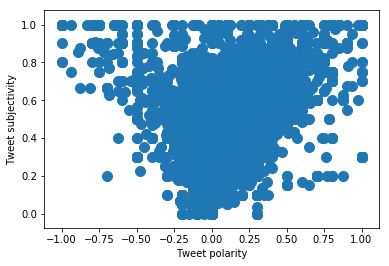

In [96]:
plt.scatter(File['Polarity'], File['Subjectivity'], s=100)
plt.xlabel('Tweet polarity')
plt.ylabel('Tweet subjectivity')
# plt.xlim(-1.1, 1.1)
# plt.ylim(-0.1, 1.1)
plt.show()

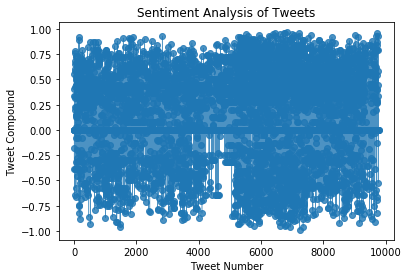

In [97]:
# Create plot
plt.plot(np.arange(len(File["Compound"])),
         File["Compound"], marker="o", linewidth=0.5,
         alpha=0.8)

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

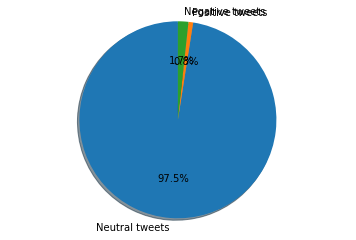

In [98]:
positive_polarity = [p for p in File['Postivity'] if p>0.5]
negative_polarity = [n for n in File['Negativity'] if n<0.5]
neutral_polarity = [r for r in File['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size


labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()